In [9]:
import numpy as np  # Import the numpy library for numerical operations

def monte_carlo_pi_antithetic(n):
    u = np.random.random(n // 2)  # Generate half of the samples
    v = 1 - u  # Generate antithetic pairs
    x = np.concatenate((u, v))  # Combine samples
    y = np.random.random(n)  # Independent Y values
    inside_circle = (x**2 + y**2) <= 1  # Check if points are inside the unit circle
    return (np.sum(inside_circle) / n) * 4  # Estimate Pi

print("Estimated Pi:", monte_carlo_pi_antithetic(1000000))  # Print the estimated value of Pi

Estimated Pi: 3.139512


In [10]:
from  scipy.integrate import quad

def f(x):
    return np.exp(-x**2)  # Target function

def g(x):
    return 1 - x**2  # Control variate (simpler function)

n = 10000
x = np.random.uniform(0, 1, n)
f_x = f(x)
g_x = g(x)

c = -np.cov(f_x, g_x)[0, 1] / np.var(g_x)  # Optimal coefficient
I_hat = np.mean(f_x + c * (g_x - np.mean(g_x)))  # Adjusted estimate

print("Monte Carlo estimate of integral using Control Variates:", I_hat)

# Compare with the more exact value using SciPy integration

exact_value = quad(f, 0, 1)[0]
print("Exact value of integral:", exact_value)

Monte Carlo estimate of integral using Control Variates: 0.7462361621498366
Exact value of integral: 0.7468241328124271


In [11]:
import numpy as np

def monte_carlo_european_call(S0, K, T, r, sigma, num_simulations):
    dt = T  # Single-step simulation
    U = np.random.normal(0, 1, num_simulations // 2)  # Standard normal samples
    V = -U  # Antithetic pairs
    
    Z = np.concatenate((U, V))  # Combine for variance reduction
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    payoff = np.maximum(ST - K, 0)
    discounted_payoff = np.exp(-r * T) * payoff
    return np.mean(discounted_payoff), np.std(discounted_payoff) / np.sqrt(num_simulations)

# Parameters
S0, K, T, r, sigma, num_simulations = 100, 100, 1, 0.05, 0.2, 100000
call_price, error = monte_carlo_european_call(S0, K, T, r, sigma, num_simulations)
print(f"European Call Option Price: {call_price:.4f} ± {error:.4f}")

European Call Option Price: 10.4393 ± 0.0465


In [12]:
def monte_carlo_var(initial_value, mu, sigma, T, alpha, num_simulations):
    dt = T
    Z = np.random.normal(0, 1, num_simulations)
    ST = initial_value * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    losses = initial_value - ST
    var_estimate = np.percentile(losses, 100 * (1 - alpha))
    return var_estimate

var_value = monte_carlo_var(1_000_000, 0.07, 0.2, 1, 0.95, 100000)
print(f"Estimated 95% Value at Risk (VaR): ${var_value:,.2f}")

Estimated 95% Value at Risk (VaR): $-456,259.53


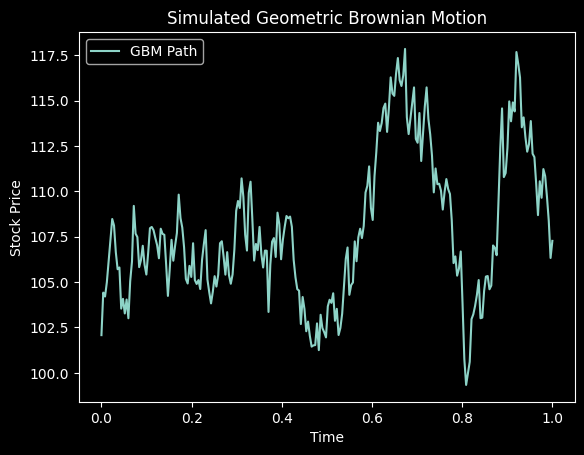

In [14]:
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    W = np.cumsum(np.random.randn(N) * np.sqrt(dt))  # Wiener process
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return t, S

t, S = simulate_gbm(100, 0.05, 0.2, 1, 252)
plt.plot(t, S, label="GBM Path")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Simulated Geometric Brownian Motion")
plt.legend()
plt.show()